## 二分法

**可以根据算法思想以及伪代码，使用任何计算机语言对算法进行实现**

**C、C++、Python、Java、MATLAB、C#、shell**

### Pseudocode 伪代码

```
Binary_Search(a, b, epsilon, function)
  binary_root = 0
  a_value = function(a)
  b_value = function(b)
  while True
    binary_root = (a+b)/2
    binary_value = function(binary_root)
    if (b-a)/2 < epsilon  || binary_value == 0
      break
    if a_value * binary_value < 0
      b = binary_root
    else if b_value * binary_value < 0
      a = binary_root
      
  return binary_root
```

### Coding


In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: binary_search.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/
# @function: 实现二分法对方程的根的搜索算法，以及简单的测试

import math

def Binary_Search(a, b, epsilon, function):
    """Get a root of function with using Binary Search.
    
    二分法进行对根的搜索，该方法一定会收敛，故此不需要设置迭代次数。
    如果需要寻找一个合适的初值，则将误差限设置大一点即可，
    返回值即可作为其他方法（Newton Method，牛顿迭代法具有局部收敛性）的迭代初始值。
    
    Args:
        a: The start of the real root interval.
        b: The end of the real root interval.
        epsilon: The error between the real solution and the myopic solution.
        function: The equation function for root.
    
    Returns:
        The root to this equation function "function".
    
    Examples:
    >>> Binary_Search(1.0, 1.5, 1e-6, math.pow(x, 3) - x - 1)
    1.25
    """
    binary_root = 0
    a_value = function(a)
    b_value = function(b)
    
    if a_value * b_value > 0:
        # 不满足数学中的 “ 零点定理 ” ，抛出异常
        raise ValueError("The function must have different sign at a and b.")
    
    while True:
        binary_root = (a + b) / 2
        binary_value = function(binary_root)
        # 迭代满足误差需求或者求得解析解，则直接退出迭代
        if ((a - b) / 2 < epsilon) or (binary_value == 0):
            break
        # 不断迭代更新有根区间
        if a_value * binary_value < 0:
            b = binary_root
        elif b_value * binary_value < 0:
            a = binary_root
        
    return binary_root


def function(x):
    return math.pow(x, 3) - x - 1


if __name__ == '__main__':
    a = 1.0
    b = 1.5
    epsilon = 1.e-10
    
    x = Binary_Search(a, b, epsilon, function)
    
    print("函数方程的近视解为：", x)
      

函数方程的近视解为： 1.25


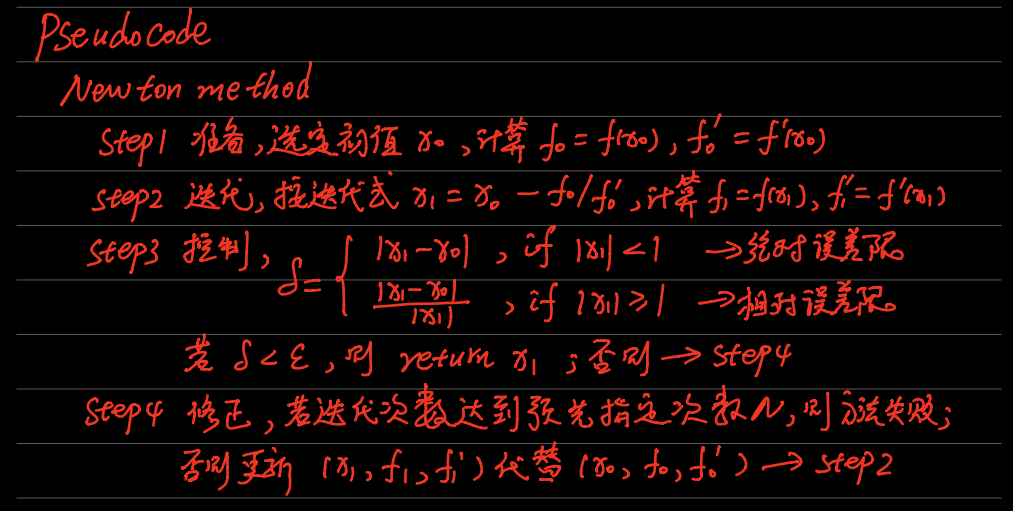

In [1]:
# ![newton_method](./image/newton_method.png)

from IPython.display import Image, display
display(Image(filename='./image/newton_method.png', embed=True))

## 牛顿迭代法



### Pseudocode

```
Newton_Method(x0, epsilon, number_iteration, function, derivative_function)
    f0 = function(x0)
    df0 = derivative_function(x0)
    
    iteration = 0
    while (iteration < number_iteration)
        x1 = x0 - f0 / df0
        f1 = function(x1)
        df1 = derivative_function(x1)
        
        if abs(x1-x0) or abs(x1 - x0) / abs(x1) < epsilon
            break
        else
            x0 = x1
            f0 = f1
            df0 = df1
            
            ++iteration
    
    return x1
```

### Coding

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: newton_method.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/
# @function: 实现牛顿迭代法求解方程的根，以及简单的测试

import math

def Newton_Method(x0, epsilon, number_iteration, function, derivative_function):
    """Implementation of Newton Method for solving equations
    
    使用 Newton Method 可能会出现收敛不了的情况，即就是发散了。
    所以需要设置一个迭代次数的上限来结束迭代过程。
    迭代是否收敛在于绝对误差或者相对误差是否达到精度需求。
    
    Args:
        x0: The initial value to equation for Newton Method.
        epsilon: The error between the previous iteration and the next iteration.
        number_iteration: The maximum number of iterations.
        function: The equation function for solving.
        derivative_function: The derivative function to the equation function for solving.
        
    Returns:
        The root to this equation function "function" with Newton Method.
        
    Examples:
    >>> Newton_Method(1.0, 1e-6, 20, math.pow(x, 3) - x - 1, 2*x*x - 1)
    1.324717957244746
    """
    f0 = function(x0)
    df0 = derivative_function(x0)

    iteration = 0
    while (iteration < number_iteration):
        # Newton 迭代式
        x1 = x0 - f0 / df0
        
        f1 = function(x1)
        df1 = derivative_function(x1)

        # 绝对误差限 |x1 - x0|
        # 相对误差限 | (x1-x0)/x1 |
        if abs(x1) < 1:
            delta = abs(x1 - x0)
        else:
            delta = abs(x1 - x0) / abs(x1)
        if delta < epsilon:
            break
        else:
            x0 = x1
            f0 = f1
            df0 = df1

            ++iteration

    return x1
    
def function(x):
    return math.pow(x, 3) - x - 1
  
def derivative_function(x): 
    return 3 * x * x - 1 

if __name__ == '__main__':
    x0 = 1.0
    epsilon = 1.e-10
    number_iteration = 20
    
    x = Newton_Method(x0, epsilon, number_iteration, function, derivative_function)
    
    print("函数方程的近视解为：", x)

函数方程的近视解为： 1.324717957244746


## 牛顿下山法

### pseudocode
```
Newton_Downhill_Method(x0, epsilon, lamda, number_iteration, function, derivative_function)
    f0 = function(x0)
    df0 = derivative_function(x0)
    
    iteration = 0
    while (iteration < number_iteration)
        x_hat = x0 - f0 / df0
        x1 = lamda*x_hat + (1-lamda)x0
        
        f1 = function(x1)
        df1 = derivative_function(x1)
        
        if abs(x1-x0) < epsilon
            break
        else
            x0 = x1
            f0 = f1
            df0 = df1
            
            ++iteration
    
    return x1
```

### Coding

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: newton_downhill_method.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/
# @function: 实现牛顿迭代法和下山法结合求解方程的根，以及简单的测试

import math

def Newton_Downhill_Method(x0, epsilon, lamda, number_iteration, function, derivative_function):
    """Implementation of Newton DownHill Method for solving equations
    
    使用 Newton Method 可能会出现收敛不了的情况，即可能出现发散了。
    所以需要设置一个迭代次数的上限来结束迭代过程。
    
    Args:
        x0: The initial value to equation for Newton DownHill Method.
        epsilon: The error between the previous iteration and the next iteration.
        lamda: Control the weighted average coefficient of Newton Method and DownHill Method, 
               named Downhill step, must be in range [0,1].
        number_iteration: The maximum number of iterations.
        function: The equation function for solving.
        derivative_function: The derivative function to the equation function for solving.
        
    Returns:
        The root to this equation function "function" with Newton Downhill Method.
        
    Examples:
    >>> Newton_Downhill_Method(1.0, 1e-6, 20, math.pow(x, 3) - x - 1, 2*x*x - 1)
    1.324717957244746
    """
    f0 = function(x0)
    df0 = derivative_function(x0)

    iteration = 0
    while (iteration < number_iteration):
        # Newton 迭代式
        x_hat = x0 - f0 / df0
        # Newton_Downhill 迭代式
        x1 = lamda * x_hat + (1 - lamda) * x0
        
        f1 = function(x1)
        df1 = derivative_function(x1)
        
        # 绝对误差限 |x1 - x0|
        # 相对误差限 | (x1-x0)/x1 |
        if abs(x1) < 1:
            delta = abs(x1 - x0)
        else:
            delta = abs(x1 - x0) / abs(x1)
        if delta < epsilon:
            break
        else:
            x0 = x1
            f0 = f1
            df0 = df1

            ++iteration

    return x1
    
def function(x):
    return math.pow(x, 3) - x - 1
  
def derivative_function(x): 
    return 3 * x * x - 1 

if __name__ == '__main__':
    x0 = 1.0
    epsilon = 1.e-10
    lamda = 0.7
    number_iteration = 20
    
    x = Newton_Method(x0, epsilon, number_iteration, function, derivative_function)
    
    print("函数方程的近视解为：", x)

函数方程的近视解为： 1.324717957244746


## 弦截法

### Pseudocode
```
Newton_Chord_Method(x0, x1, epsilon, number_iteration, function)
    f0 = function(x0)
    f1 = function(x1)
    
    iteration = 0
    while (iteration < number_iteration)
        x2 = x1 - f1 / (f1 + f0) * (x1 - x0)
        
        if abs(x2-x1) < epsilon
            break
        else
            x0 = x1
            x1 = x2
            f0 = function(x1)
            f1 = function(x2)
            
            ++iteration
    
    return x2
```

### Coding

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# @author: weili
# @filename: newton_chord_method.py
# @copyright: https://gitee.com/weili_yzzcq/MachineLearning/numerical_analysis_calculation/
# @copyright: https://github.com/2694048168/MachineLearning/numerical_analysis_calculation/
# @function: 实现牛顿迭代法和弦截法代替一阶导数结合求解方程的根，以及简单的测试

import math

def Newton_Chord_Method(x0, x1, epsilon, number_iteration, function):
    """Implementation of Newton Chord Method for solving equations
    
    使用 Newton Method 可能会出现收敛不了的情况，即可能出现发散了。
    所以需要设置一个迭代次数的上限来结束迭代过程。
    
    Args:
        x0: The first initial value to equation for Newton Chord Method.
        x2: The secondary initial value to equation for Newton Chord Method.
        epsilon: The error between the previous iteration and the next iteration.
        number_iteration: The maximum number of iterations.
        function: The equation function for solving.
        
    Returns:
        The root to this equation function "function" with Newton Chord Method.
        
    Examples:
    >>> Newton_Chord_Method(1.0, 1.05, 1e-6, 20, math.pow(x, 3) - x - 1)
    1.1572463768215488
    """
    f0 = function(x0)
    f1 = function(x1)
    
    iteration = 0
    while (iteration < number_iteration):
        x2 = x1 - f1 / (f1 + f0) * (x1 - x0)
        
        # 绝对误差限 |x1 - x0|
        # 相对误差限 | (x1-x0)/x1 |
        if abs(x1) < 1:
            delta = abs(x1 - x0)
        else:
            delta = abs(x1 - x0) / abs(x1)
        if delta < epsilon:
            break
        else:
            x0 = x1
            x1 = x2
            f0 = function(x1)
            f1 = function(x2)
            
            ++iteration
    
    return x2


def function(x):
    return math.pow(x, 3) - x - 1
  

if __name__ == '__main__':
    x0 = 1.0
    x1 = 1.2
    epsilon = 1.e-10
    number_iteration = 20
    
    x = Newton_Chord_Method(x0, x1, epsilon, number_iteration, function)
    
    print("函数方程的近视解为：", x)

函数方程的近视解为： 1.1572463768215488
